<a href="https://colab.research.google.com/github/batra-akshat/Introduction_to_ml/blob/main/dwdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engineering Placements Prediction

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_csv('/content/drive/MyDrive/Introduction_to_ml/collegePlace.csv')

## Data Clean

In [84]:
print(df.head())

   Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
0   22    Male  ...                 1            1
1   21  Female  ...                 1            1
2   22  Female  ...                 0            1
3   21    Male  ...                 1            1
4   22    Male  ...                 0            1

[5 rows x 8 columns]


In [85]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

* No missing values. Appreciate that!

## EDA

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


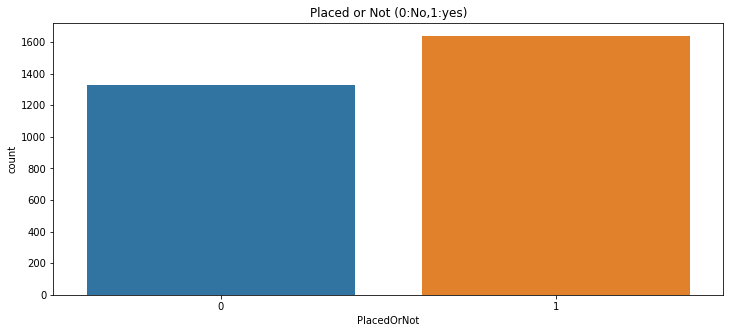

In [88]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="PlacedOrNot")
plt.title("Placed or Not (0:No,1:yes)");

* We clearly see that there are more placed that not

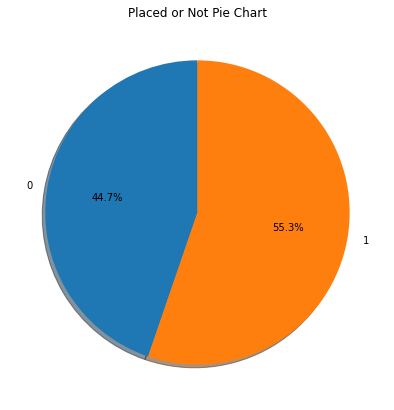

In [89]:
labels = "0","1"
sizes = [df["PlacedOrNot"].value_counts()[0],df["PlacedOrNot"].value_counts()[1]]


fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Placed or Not Pie Chart")

plt.show()

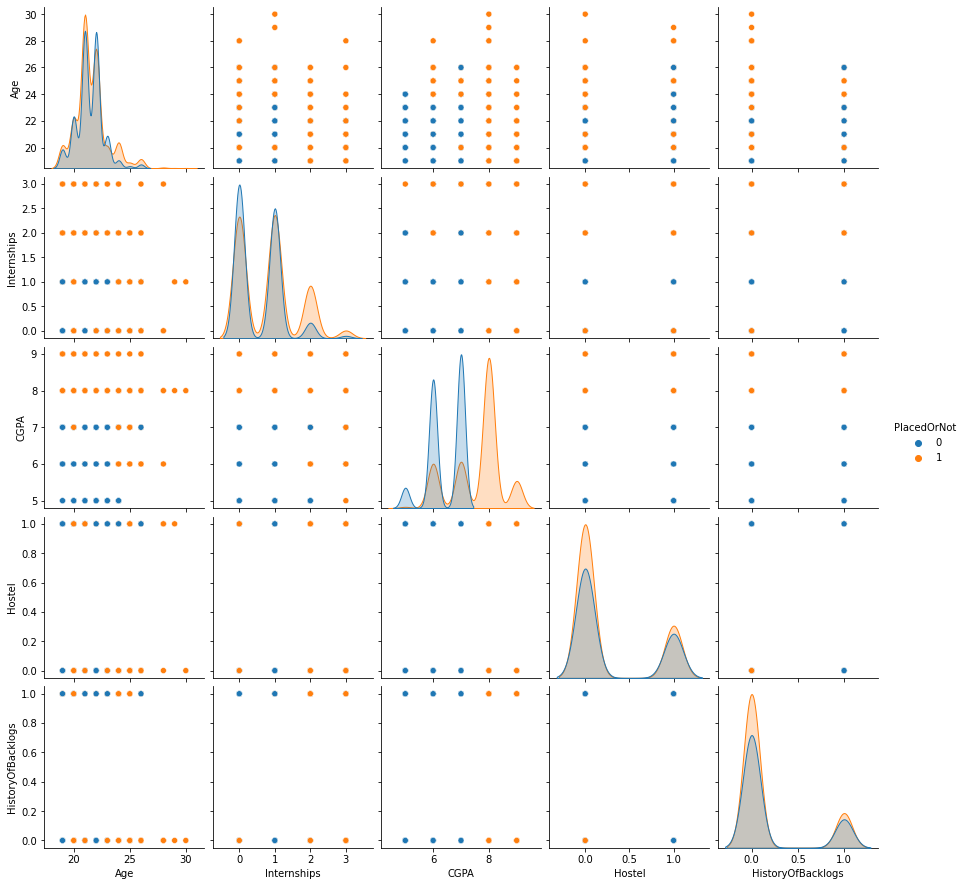

In [90]:
sns.pairplot(df,hue="PlacedOrNot");

#### Important!. We can the that one of the key factors for placement is CGPA. Internships a little bit too

In [91]:
df = df.astype({"Hostel": object, "PlacedOrNot": object,"HistoryOfBacklogs":object})

* We change the type of the columns for the EDA,although they are numerical, they represent  categorical values

In [92]:
def Count_Values(dataframe):
    categorical=dataframe.select_dtypes(include="object").columns.values.tolist()
    for col in categorical:
        print(f"Value Counts in {col} is: \n {dataframe[col].value_counts()}")
        print("\n")
Count_Values(df)

Value Counts in Gender is: 
 Male      2475
Female     491
Name: Gender, dtype: int64


Value Counts in Stream is: 
 Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64


Value Counts in Hostel is: 
 0    2168
1     798
Name: Hostel, dtype: int64


Value Counts in HistoryOfBacklogs is: 
 0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64


Value Counts in PlacedOrNot is: 
 1    1639
0    1327
Name: PlacedOrNot, dtype: int64




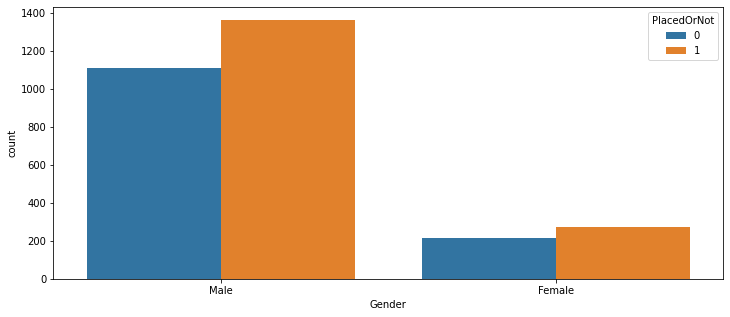

In [93]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Gender",hue="PlacedOrNot");

* In the dataset there are more males than females. But as we previously saw, both genders were more placed than not

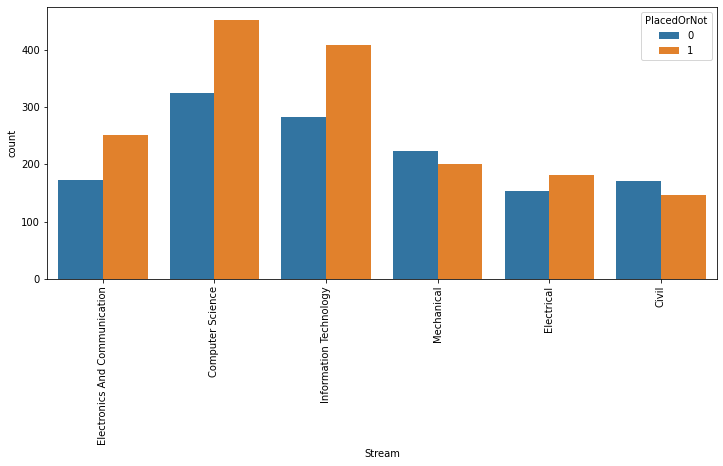

In [94]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Stream",hue="PlacedOrNot")
plt.xticks(rotation=90);

* In the dataset we can see (as in value_counts function we previously did) that the two top streams are CS and IT. While, in Mechanical and Civil engineer the majority of students where not placed

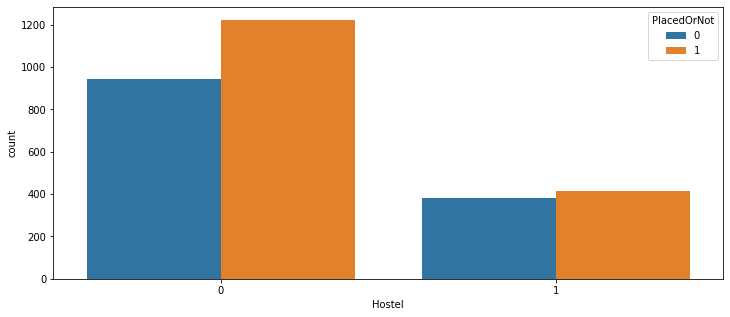

In [95]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Hostel",hue="PlacedOrNot");

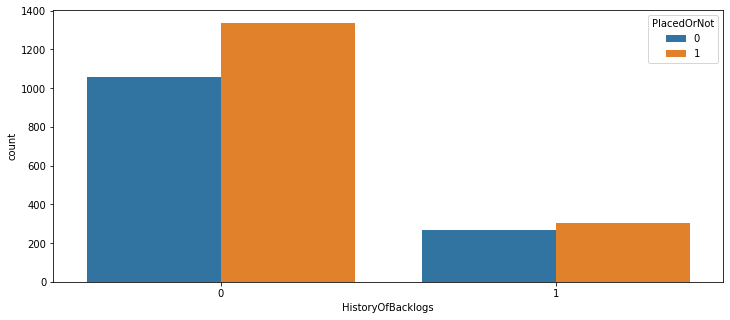

In [96]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="HistoryOfBacklogs",hue="PlacedOrNot");

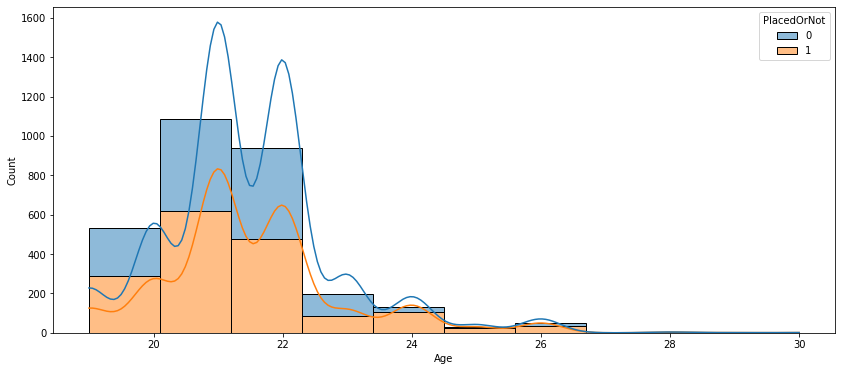

In [97]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x="Age",bins=10,kde=True,hue="PlacedOrNot",multiple="stack");

* Seems that age has no relation with being placed or not

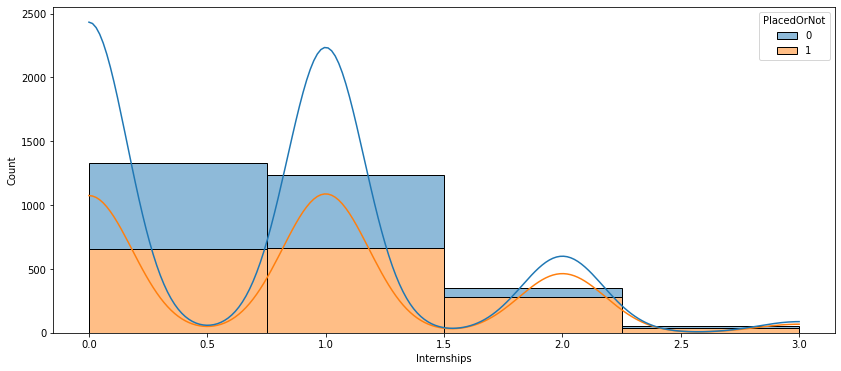

In [98]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x="Internships",bins=4,kde=True,hue="PlacedOrNot",multiple="stack");

* As we said, internships in values more than 2 tends to pass the "Not" curve.

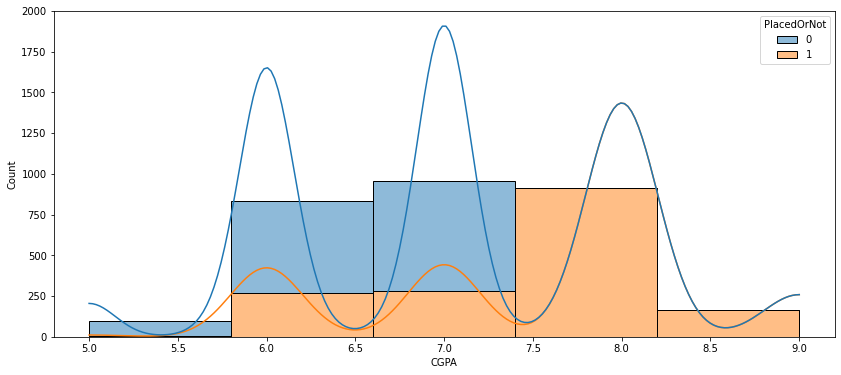

In [99]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x="CGPA",bins=5,kde=True,hue="PlacedOrNot",multiple="stack");

* CGPA shows a really clear tendence. The more your CGPA is bigger the chances to get placed

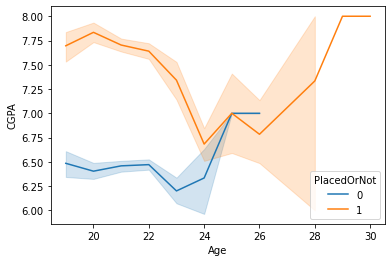

In [100]:
sns.lineplot(data=df,x="Age",y="CGPA",hue="PlacedOrNot");

* A nice lineplot showing how the CGPA impacts in the placement. Also that the age is indeferent in the CGPA values. As we can see that at lower CGPA values at maybe 23 years tends to go higher again. While at the top CGPA at 23 it keeps going down

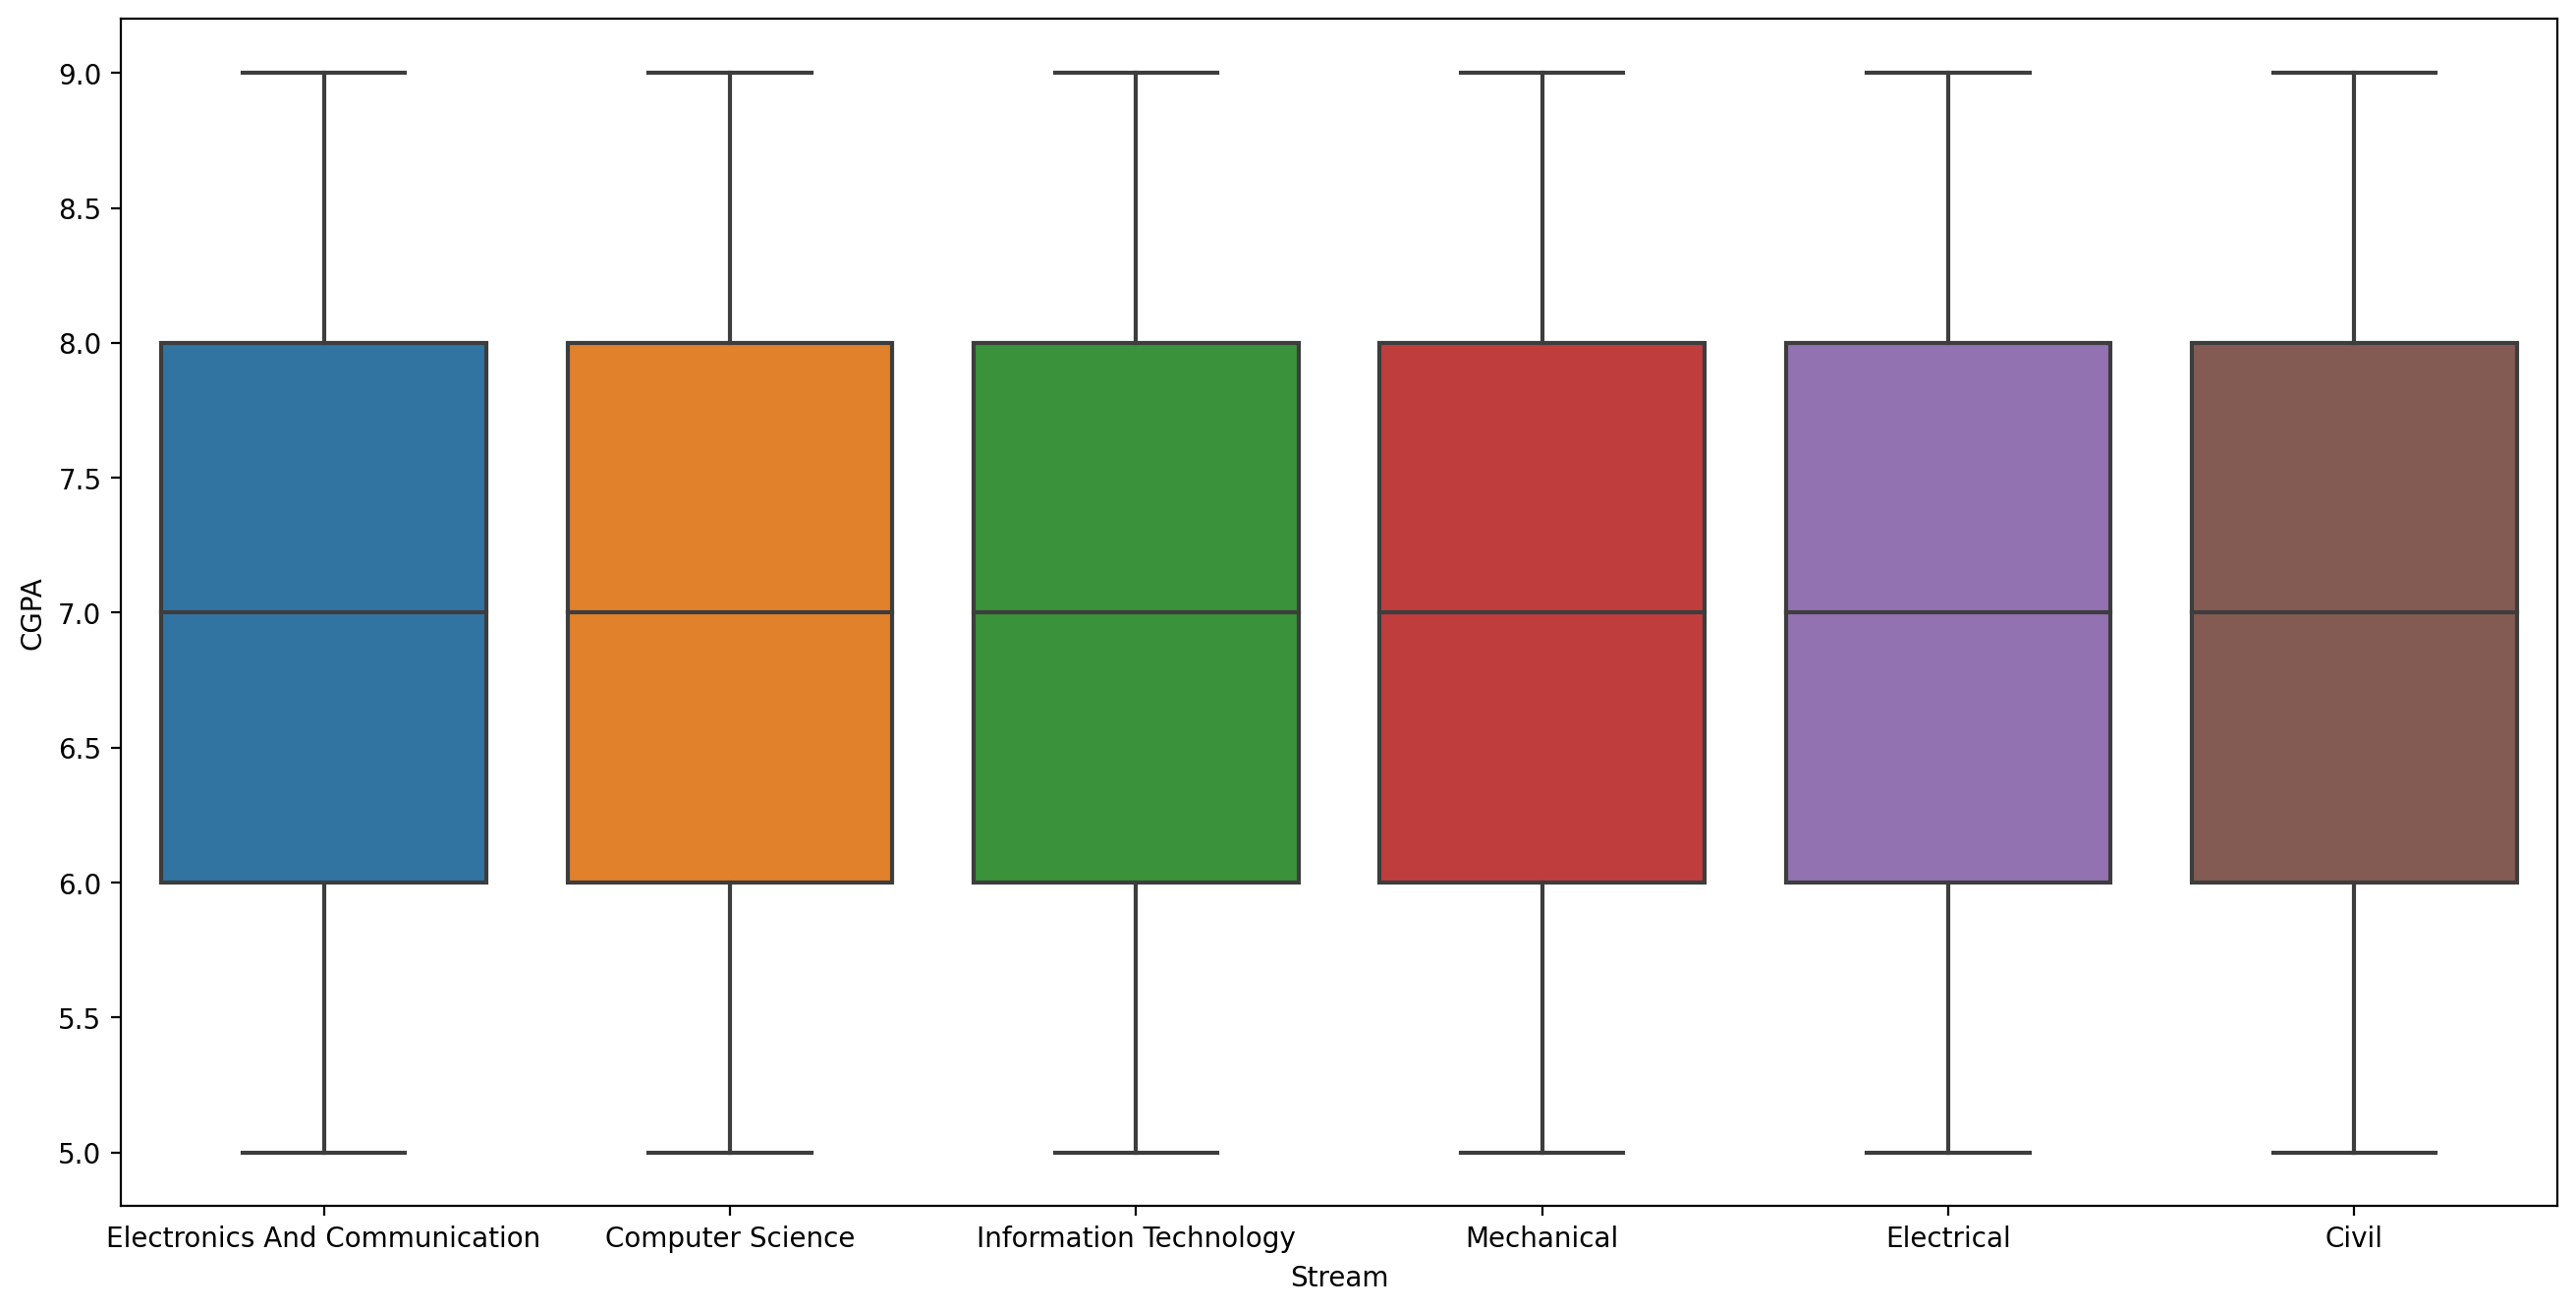

In [101]:
plt.figure(figsize=(16,8),dpi=200)
sns.boxplot(data=df,x="Stream",y="CGPA");

* I personally thought that depending on the stream the CGPA was going to change. I was wrong

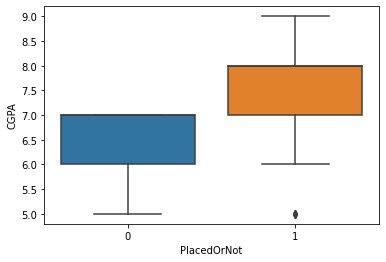

In [102]:
sns.boxplot(data=df,x="PlacedOrNot",y="CGPA");

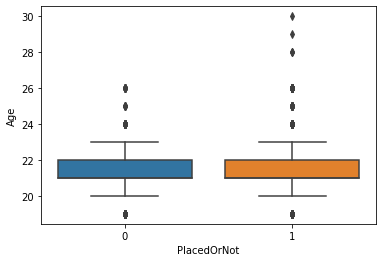

In [103]:
sns.boxplot(data=df,x="PlacedOrNot",y="Age");

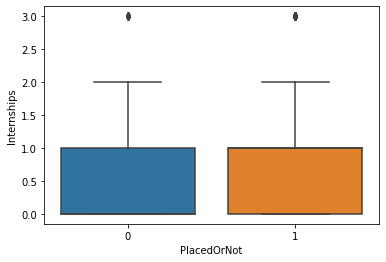

In [104]:
sns.boxplot(data=df,x="PlacedOrNot",y="Internships");

### Now we are goin to encode the labels for making the Corr Matrix

In [105]:
def Label_Encoder(dataframe):
    from sklearn.preprocessing import LabelEncoder
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype =='float64' or dataframe[col].dtype=="int64"]
    dataframe2=dataframe.copy()
    subset=cat_cols
    subset2=num_cols
    dataframe2.drop(subset2,axis=1,inplace=True)
    dataframe2=dataframe2.apply(LabelEncoder().fit_transform)
    dataframe.drop(subset,axis=1,inplace=True)
    final_dataframe=pd.concat([dataframe,dataframe2],axis=1)
    
    return final_dataframe
df=Label_Encoder(df)
df.head()

,Age,Internships,CGPA,Gender,Stream,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,3,1,1,1
1,21,0,7,0,1,1,1,1
2,22,1,6,0,4,0,0,1
3,21,0,8,1,4,0,1,1
4,22,0,8,1,5,1,0,1


PlacedOrNot          1.000000
CGPA                 0.588648
Internships          0.179334
Age                  0.046943
Hostel               0.038182
HistoryOfBacklogs    0.022337
Gender               0.006705
Stream               0.001341
Name: PlacedOrNot, dtype: float64

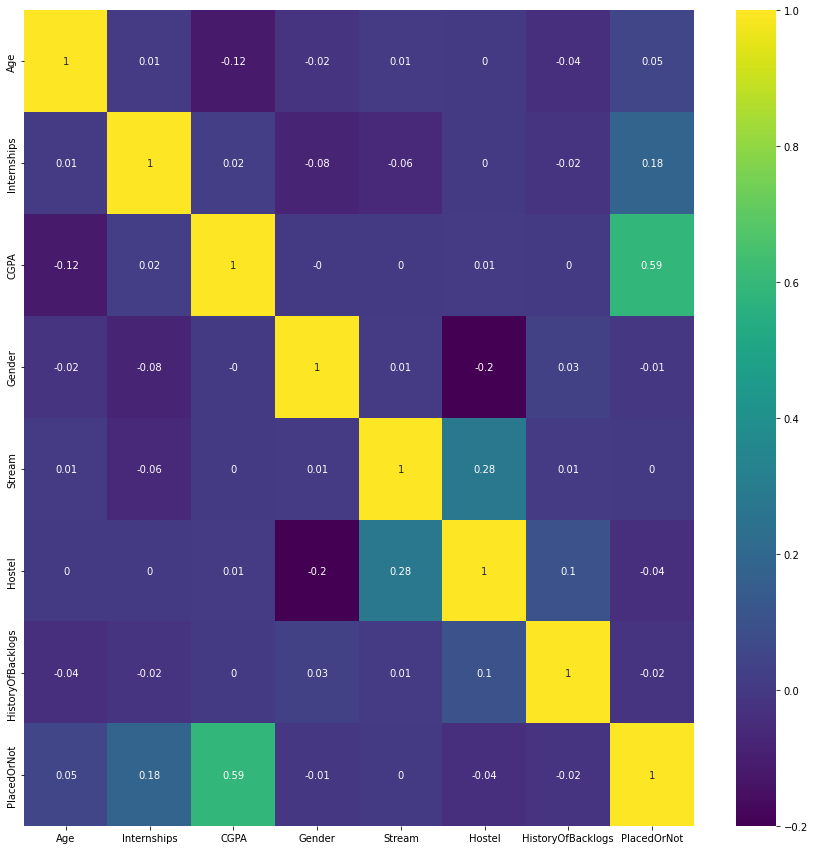

In [106]:
def Corr(dataframe,target_variable):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(15,15))
    correlation_matrix = dataframe.corr().round(2)
    sns.heatmap(data=correlation_matrix, annot=True,cmap="viridis")
    
    correlation = dataframe.corr()[target_variable].abs().sort_values(ascending = False)
    
    return correlation

Corr(df,"PlacedOrNot")

* Now we confirm our suspects. CGPA has the highest Pearson value with the target feature. Followed behind by the Internships

# Data Preprocessing

In [107]:
X=df.drop("PlacedOrNot",axis=1)
y=df["PlacedOrNot"]

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Machine Learning Algorithms


# K Nearest Neighboors

In [110]:
from sklearn.neighbors import KNeighborsClassifier

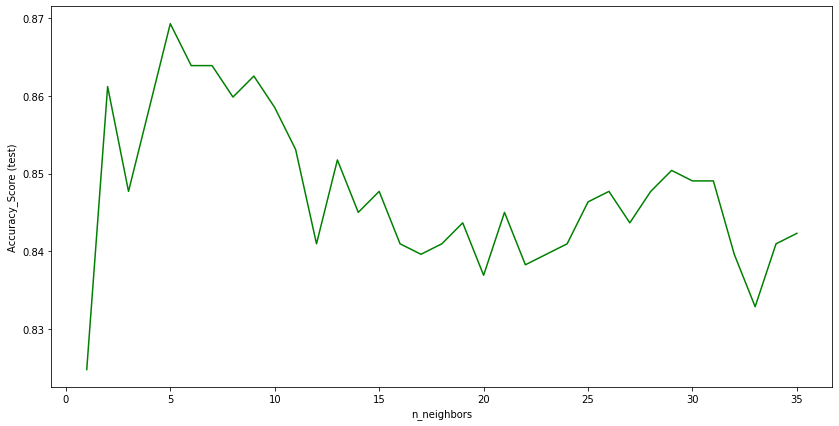

In [111]:
acc=[]
for n in range(1,36):
    KNC=KNeighborsClassifier(n_neighbors=n)
    KNC.fit(X_train,y_train)
    y_pred= KNC.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

plt.figure(figsize=(14,7))
sns.lineplot(x=np.arange(1,36),y=acc,color="green")
plt.ylabel("Accuracy_Score (test)")
plt.xlabel("n_neighbors");

* We see that at 2-3 neighbors the algorithm gets the best acc

In [112]:
KNC=KNeighborsClassifier(n_neighbors=2)
KNC.fit(X_train,y_train)
preds=KNC.predict(X_train)
preds2=KNC.predict(X_test)


In [113]:
knc_score=accuracy_score(y_test,preds2)
print(f"Train Accuracy: {accuracy_score(y_train,preds)}")
print(f"Test Accuracy: {accuracy_score(y_test,preds2)}")

Train Accuracy: 0.8938848920863309
Test Accuracy: 0.8611859838274932


In [114]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       332
           1       0.95      0.79      0.86       410

    accuracy                           0.86       742
   macro avg       0.87      0.87      0.86       742
weighted avg       0.88      0.86      0.86       742



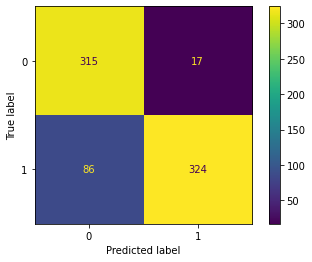

In [115]:
plot_confusion_matrix(KNC,X_test,y_test);

#### Roc Curve

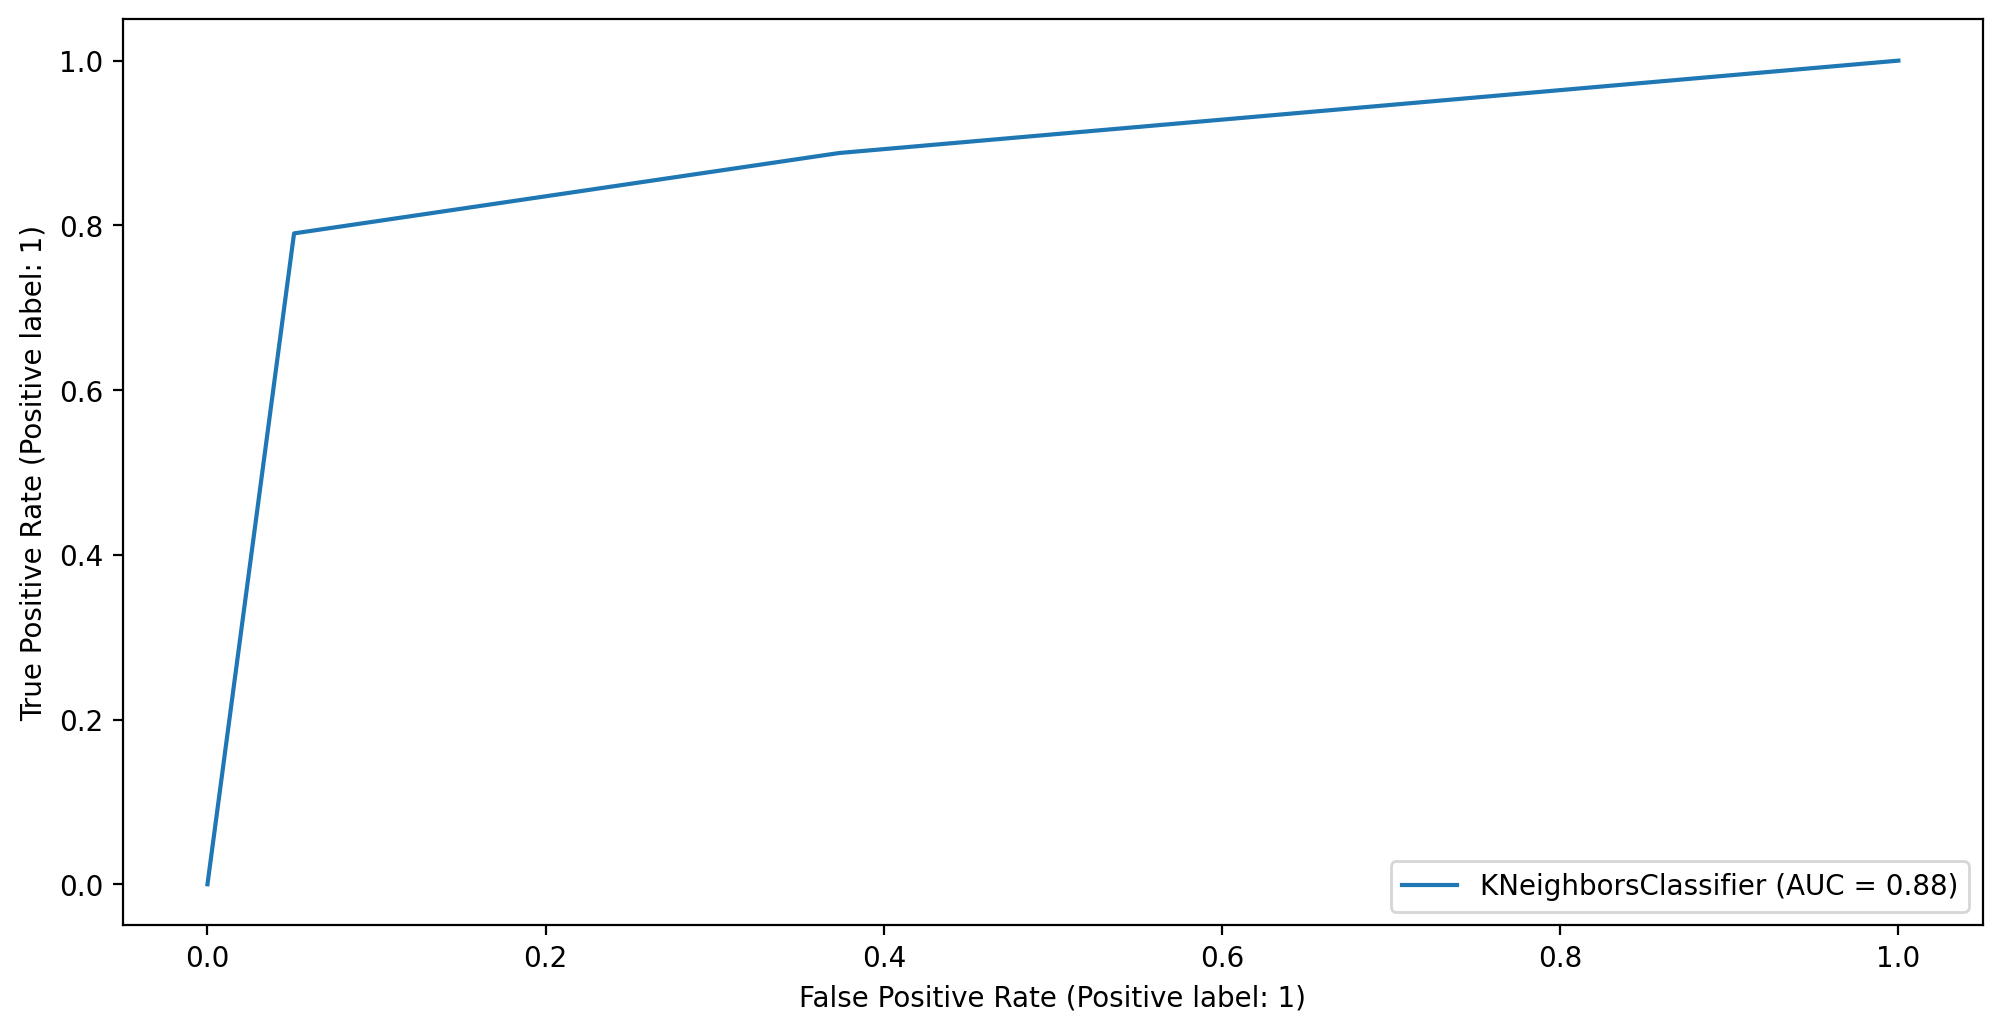

In [116]:
fig,ax=plt.subplots(figsize=(12,6),dpi=200)
plot_roc_curve(KNC,X_test,y_test,ax=ax);

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rfc=RandomForestClassifier()
param_grid={
    "n_estimators":[64,100,128,200],
    "max_features":[2,3,4],
    "bootstrap":[True,False],
}

In [119]:
grid=GridSearchCV(rfc,param_grid,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]},
             verbose=1)

In [120]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64}

In [121]:
rfc=RandomForestClassifier(max_features=4,n_estimators=128,bootstrap=False)
rfc.fit(X_train,y_train)
preds=rfc.predict(X_train)
preds2=rfc.predict(X_test)

In [122]:
rfc_score=accuracy_score(y_test,preds2)
print(f"Train Accuracy: {accuracy_score(y_train,preds)}")
print(f"Test Accuracy: {accuracy_score(y_test,preds2)}")

Train Accuracy: 0.9240107913669064
Test Accuracy: 0.8814016172506739


In [123]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       332
           1       0.93      0.85      0.89       410

    accuracy                           0.88       742
   macro avg       0.88      0.89      0.88       742
weighted avg       0.89      0.88      0.88       742



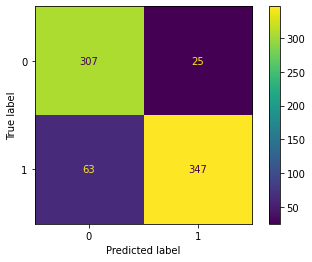

In [124]:
plot_confusion_matrix(rfc,X_test,y_test);

#### Roc Curve

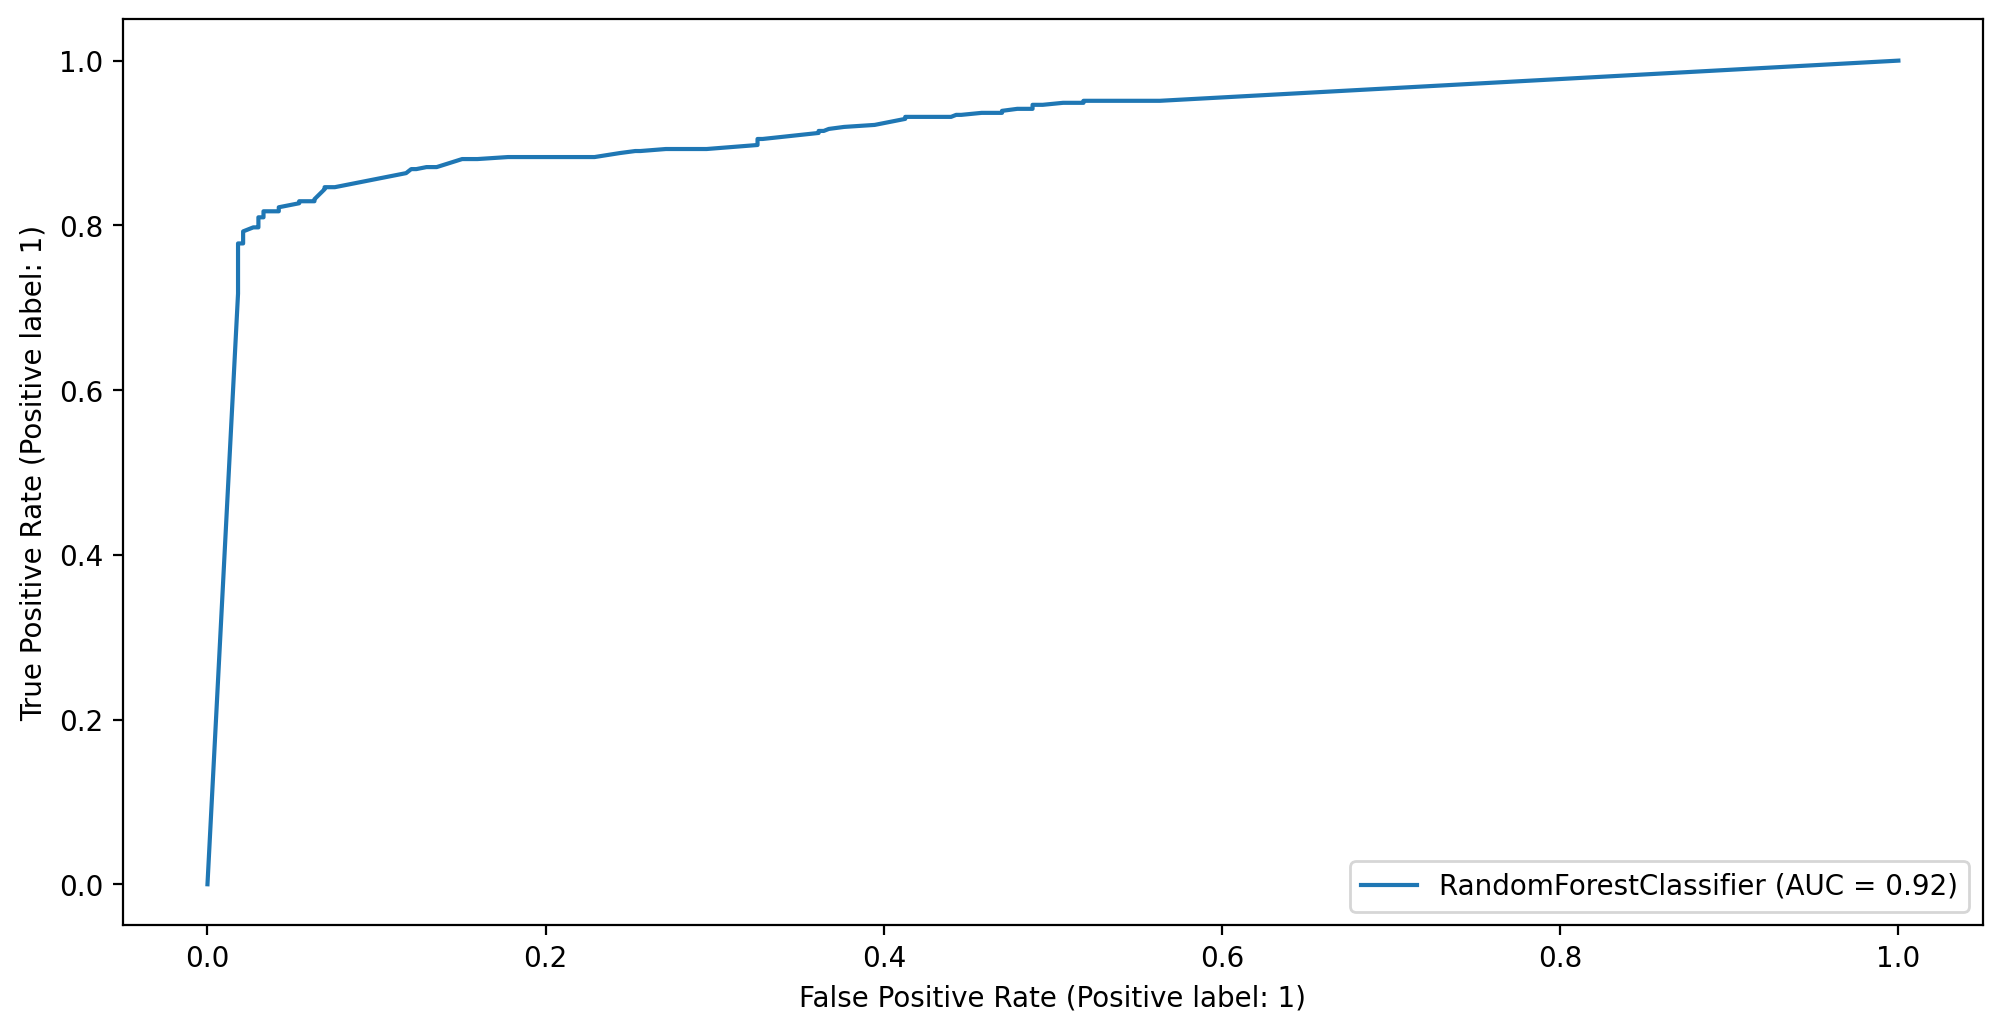

In [125]:
fig,ax=plt.subplots(figsize=(12,6),dpi=200)
plot_roc_curve(rfc,X_test,y_test,ax=ax);

# Model Summary

In [126]:
models = pd.DataFrame({
    'Model' : ['KNN',  'Random Forest Classifier'],
    'Score' : [knc_score,  rfc_score]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,0.881402
0,KNN,0.861186
